In [1]:
from inception_v4 import inception_v4
from keras.models import Model, model_from_json
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, AveragePooling2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import numpy as np
import pandas as pd
import cv2
import math
import scipy.io as scio
import os
import matplotlib.pyplot as plt
%matplotlib inline
from utils import generate_generator, gen_img_paths_and_labels, loss_APE, LossHistory, SaveModelOnMAPE
from sklearn.utils import shuffle


os.environ["CUDA_VISIBLE_DEVICES"] = "0"
net = 'inceptionV4'
LOSS = 'MAPE'

/home/chengxg/anaconda2/envs/zp_py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Data import
split_idx = (np.asarray([0, 2400, 5160, 7920, 10080, 11880, 13440])*5).tolist()
idx_validate = 5
data = pd.read_excel('./imgPaths_labels_isSensor_new.xlsx')
paths, labels, sensor = data['img_path'], data['label'], data['sensor']
paths = np.squeeze(np.asarray(paths)).tolist()
labels = np.squeeze(np.asarray(labels)).tolist()
sensor = np.squeeze(np.asarray(sensor)).tolist()
train_paths = paths[:split_idx[idx_validate-1]] + paths[split_idx[idx_validate]:]
test_paths = paths[split_idx[idx_validate-1]:split_idx[idx_validate]]
train_labels = labels[:split_idx[idx_validate-1]] + labels[split_idx[idx_validate]:]
test_labels = labels[split_idx[idx_validate-1]:split_idx[idx_validate]]
train_sensor = sensor[:split_idx[idx_validate-1]] + sensor[split_idx[idx_validate]:]
test_sensor = sensor[split_idx[idx_validate-1]:split_idx[idx_validate]]

test_paths = np.asarray(test_paths).reshape(len(test_paths), 1)
test_labels= np.asarray(test_labels).reshape(len(test_labels), 1)

idx_real = np.where(np.asarray(test_sensor) == 1)
idx_test = np.loadtxt('./indices/indices_test_or_5_val_{}.txt'.format(idx_validate)).astype(int)
test_paths_real = test_paths[idx_real]
test_labels_real = test_labels[idx_real]
test_paths_for_test = np.squeeze(test_paths[idx_test]).tolist()
test_labels_for_test = np.squeeze(test_labels[idx_test]).tolist()
idx_val = np.loadtxt('./indices/indices_rand_val_no_5_val_{}.txt'.format(idx_validate)).astype(int)
validate_paths = test_paths[idx_val]
validate_labels = test_labels[idx_val]

test_paths = np.squeeze(test_paths).tolist()
test_labels = np.squeeze(test_labels).tolist()
test_paths_real = np.squeeze(test_paths_real).tolist()
test_labels_real = np.squeeze(test_labels_real).tolist()

validate_paths, validate_labels = np.squeeze(validate_paths).tolist(), np.squeeze(validate_labels).tolist()

idx_train_rand = shuffle(range(len(train_labels)))
train_paths = np.asarray(train_paths)[idx_train_rand].tolist()
train_labels = np.asarray(train_labels)[idx_train_rand].tolist()

print('data[:3]:\n', data[:3])
print('len(train_paths), len(train_labels):', len(train_paths), len(train_labels))
print('len(validate_paths), len(validate_labels):', len(validate_paths), len(validate_labels))
print('len(test_paths), len(test_labels):', len(test_paths), len(test_labels))

data[:3]:
    index                                          img_path      label  sensor
0      0  ./split_frames_new/1_point_05/1_point_05_0_0.jpg  72.895116       0
1      1  ./split_frames_new/1_point_05/1_point_05_0_1.jpg  72.895116       0
2      2  ./split_frames_new/1_point_05/1_point_05_0_2.jpg  72.895116       0
len(train_paths), len(train_labels): 58200 58200
len(validate_paths), len(validate_labels): 75 75
len(test_paths), len(test_labels): 9000 9000


Training...
epochs per iteration = 20
Epoch 1/120
188/188 [==============================] - 127s 674ms/step - loss: 50.6838 - val_loss: 161630640.0000
Epoch 2/120
188/188 [==============================] - 93s 496ms/step - loss: 26.7132 - val_loss: 33495978.0000
Epoch 3/120
188/188 [==============================] - 97s 517ms/step - loss: 20.4886 - val_loss: 9575988.0000
Epoch 4/120
188/188 [==============================] - 100s 532ms/step - loss: 18.0747 - val_loss: 19502.2578
Epoch 5/120
188/188 [==============================] - 98s 523ms/step - loss: 15.3736 - val_loss: 319609.4688
Epoch 6/120
188/188 [==============================] - 99s 526ms/step - loss: 15.2851 - val_loss: 131453.9844
Epoch 7/120
188/188 [==============================] - 99s 524ms/step - loss: 13.4540 - val_loss: 67401.1719
Epoch 8/120
188/188 [==============================] - 99s 527ms/step - loss: 13.1248 - val_loss: 28465.6875
Epoch 9/120
188/188 [==============================] - 98s 522ms/step - loss:

Epoch 77/120
188/188 [==============================] - 98s 519ms/step - loss: 5.9915 - val_loss: 139.9680
Epoch 78/120
188/188 [==============================] - 98s 521ms/step - loss: 6.5075 - val_loss: 51.9011
Epoch 79/120
188/188 [==============================] - 98s 523ms/step - loss: 6.1576 - val_loss: 30.8211
Epoch 80/120
188/188 [==============================] - 99s 524ms/step - loss: 6.4471 - val_loss: 12.6288
Epoch 81/120
188/188 [==============================] - 97s 515ms/step - loss: 6.1734 - val_loss: 20.0853
Epoch 82/120
188/188 [==============================] - 99s 527ms/step - loss: 5.9856 - val_loss: 54.8494
Epoch 83/120
188/188 [==============================] - 100s 529ms/step - loss: 6.1431 - val_loss: 680.7325
Epoch 84/120
188/188 [==============================] - 97s 518ms/step - loss: 5.8647 - val_loss: 251.2033
Epoch 85/120
188/188 [==============================] - 99s 524ms/step - loss: 6.3487 - val_loss: 189.7951
Epoch 86/120
188/188 [===================

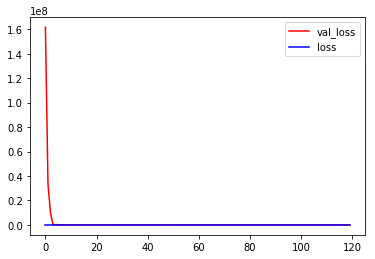

In [3]:
# Train
# transfer pre-trained model
base_model = inception_v4(weights='imagenet', include_top=False, input_shape=((890 - 95)//6, 1920//6, 3))
# additional layers: one Global avg-pooling layer and one dense layer as output layer.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='relu')(x)

model = Model(inputs=base_model.input, outputs=x, name=net)
model.compile(optimizer='adam', loss='mean_absolute_percentage_error')    # Error: MAPE

loss_history = LossHistory()
saver_on_MAPE = SaveModelOnMAPE()
if not os.path.exists(os.path.join('weights_new', net, 'Test_set_{}'.format(idx_validate))):
    os.makedirs(os.path.join('weights_new', net, 'Test_set_{}'.format(idx_validate)))
print('Training...')
batch_size_train = 16
validation_interval = 3000
batch_size_validate = math.floor(len(validate_labels)/1)
epochs_per_iteration = math.ceil(len(train_labels) / validation_interval)
print('epochs per iteration =', epochs_per_iteration)
train_generator = generate_generator(train_paths, train_labels, batch_size=batch_size_train, reverse=True)
validate_generator = generate_generator(validate_paths, validate_labels, batch_size=batch_size_validate)
# checkpointer_best = ModelCheckpoint('./weights_new/'+net+'_MAPE.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
history = model.fit_generator(
    train_generator, steps_per_epoch=math.ceil(validation_interval/batch_size_train),
    epochs=epochs_per_iteration*6,
    validation_data=validate_generator, validation_steps=1,
    verbose=1, callbacks=[loss_history, saver_on_MAPE]
)
with open('./weights_new/'+net+'_MAPE.json', 'w') as fout:
    fout.write(model.to_json())
vl, l = history.history['val_loss'], history.history['loss']
if not os.path.exists(os.path.join('loss_new', net, 'Test_set_{}'.format(idx_validate))):
    os.makedirs(os.path.join('loss_new', net, 'Test_set_{}'.format(idx_validate)))
np.savetxt(os.path.join('loss_new', net, 'Test_set_{}'.format(idx_validate), '{}_val.txt'.format(LOSS)), vl)
np.savetxt(os.path.join('loss_new', net, 'Test_set_{}'.format(idx_validate), '{}_train.txt'.format(LOSS)), l)
with open('./weights_new/'+net+'_MAPE.json', 'w') as fout:
    fout.write(model.to_json())
plt.plot(vl, 'r')
plt.plot(l, 'b')
plt.legend(['val_loss', 'loss'])
plt.show()

In [4]:
os.system("mv weights_new/{}/*.hdf5 weights_new/{}/Test_set_{}".format(net, net, idx_validate))
with open('./weights_new/'+net+'_MAPE.json', 'r') as fout:
    model = model_from_json(fout.read())
models = [i for i in os.listdir('./weights_new/' + net + '/Test_set_{}'.format(idx_validate)) if 'epoch' in i]
models = sorted(models, key=lambda x: int(x.split('epoch')[1].split('_')[0]))
losses = []
epochs = []
for i in models:
    losses.append(float(i.split('_')[-1][4:-5]))
    epochs.append(int(i.split('epoch')[-1].split('_')[0]))

print('len(losses):', len(losses))
for idx, loss in enumerate(losses):
    if idx < 0:
        continue
    if idx > 200:
        break
    print(idx, 'loading', net+'_MAPE'+str(loss)+'.hdf5 ...')
    model.load_weights('./weights_new/'+net+'/Test_set_{}/'.format(idx_validate)+net+'_epoch'+str(epochs[idx])+'_MAPE'+str(loss)+'.hdf5')
    test_epoch = len(test_labels_for_test) // 50
    batch_size_for_test = len(test_labels_for_test) // test_epoch
    test_generator = generate_generator(test_paths_for_test, test_labels_for_test, batch_size=batch_size_for_test)
    preds = []
    y_vals = []
    print('Generating ', end='')
    for i in range(test_epoch)[:]:
        print('{}/{}'.format(i+1, test_epoch), end=', ')
        x_val, y_val = test_generator.__next__()
        preds += np.squeeze(model.predict(x_val)).tolist()
        y_vals += y_val.tolist()
    print('')
    preds = np.asarray(preds)
    y_vals = np.asarray(y_vals).astype(np.float)
    MSE, MAE, MAPE = round(np.mean(np.square(preds.ravel()-y_vals.ravel())), 3), round(np.mean(np.abs(preds.ravel()-y_vals.ravel())), 3), round(100 * np.mean(np.abs(preds.ravel() - y_vals.ravel()) / y_vals.ravel()), 3)
    print('MAE={}, MAPE={}'.format(MAE, MAPE))
    if not os.path.exists('./preds_new/'+net+'/Test_set_{}/'.format(idx_validate)):
        os.makedirs('./preds_new/'+net+'/Test_set_{}/'.format(idx_validate))
    np.savetxt('./preds_new/'+net+'/Test_set_{}/Subject_Interpolation/'.format(idx_validate)+net+'_{}_epoch'.format(LOSS)+str(epochs[idx])+'_MAPE{}_MAE{}_MSE{}.txt'.format(
        str(MAPE)[:str(MAE).find('.')+2], str(MAE)[:str(MAE).find('.')+2], str(MSE)[:str(MSE).find('.')+2]),  preds)
    # plt.plot(preds[:100])
    # plt.plot(y_vals[:100])
    # plt.legend(['pd', 'lbl'])
    # plt.show()

len(losses): 120
0 loading inceptionV4_MAPE161630640.0.hdf5 ...
Generating 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 7/36, 8/36, 9/36, 10/36, 11/36, 12/36, 13/36, 14/36, 15/36, 16/36, 17/36, 18/36, 19/36, 20/36, 21/36, 22/36, 23/36, 24/36, 25/36, 26/36, 27/36, 28/36, 29/36, 30/36, 31/36, 32/36, 33/36, 34/36, 35/36, 36/36, 
MAE=233220567.764, MAPE=159256840.569
1 loading inceptionV4_MAPE33495978.0.hdf5 ...
Generating 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 7/36, 8/36, 9/36, 10/36, 11/36, 12/36, 13/36, 14/36, 15/36, 16/36, 17/36, 18/36, 19/36, 20/36, 21/36, 22/36, 23/36, 24/36, 25/36, 26/36, 27/36, 28/36, 29/36, 30/36, 31/36, 32/36, 33/36, 34/36, 35/36, 36/36, 
MAE=46756166.74, MAPE=33619110.09
2 loading inceptionV4_MAPE9575988.0.hdf5 ...
Generating 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 7/36, 8/36, 9/36, 10/36, 11/36, 12/36, 13/36, 14/36, 15/36, 16/36, 17/36, 18/36, 19/36, 20/36, 21/36, 22/36, 23/36, 24/36, 25/36, 26/36, 27/36, 28/36, 29/36, 30/36, 31/36, 32/36, 33/36, 34/36, 35/36, 36/36, 
MAE=1359

Generating 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 7/36, 8/36, 9/36, 10/36, 11/36, 12/36, 13/36, 14/36, 15/36, 16/36, 17/36, 18/36, 19/36, 20/36, 21/36, 22/36, 23/36, 24/36, 25/36, 26/36, 27/36, 28/36, 29/36, 30/36, 31/36, 32/36, 33/36, 34/36, 35/36, 36/36, 
MAE=508.229, MAPE=255.454
50 loading inceptionV4_MAPE394.082.hdf5 ...
Generating 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 7/36, 8/36, 9/36, 10/36, 11/36, 12/36, 13/36, 14/36, 15/36, 16/36, 17/36, 18/36, 19/36, 20/36, 21/36, 22/36, 23/36, 24/36, 25/36, 26/36, 27/36, 28/36, 29/36, 30/36, 31/36, 32/36, 33/36, 34/36, 35/36, 36/36, 
MAE=770.634, MAPE=369.144
51 loading inceptionV4_MAPE1464.679.hdf5 ...
Generating 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 7/36, 8/36, 9/36, 10/36, 11/36, 12/36, 13/36, 14/36, 15/36, 16/36, 17/36, 18/36, 19/36, 20/36, 21/36, 22/36, 23/36, 24/36, 25/36, 26/36, 27/36, 28/36, 29/36, 30/36, 31/36, 32/36, 33/36, 34/36, 35/36, 36/36, 
MAE=2328.02, MAPE=1445.391
52 loading inceptionV4_MAPE47.774.hdf5 ...
Generating 1/36, 2/36, 3

Generating 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 7/36, 8/36, 9/36, 10/36, 11/36, 12/36, 13/36, 14/36, 15/36, 16/36, 17/36, 18/36, 19/36, 20/36, 21/36, 22/36, 23/36, 24/36, 25/36, 26/36, 27/36, 28/36, 29/36, 30/36, 31/36, 32/36, 33/36, 34/36, 35/36, 36/36, 
MAE=87.178, MAPE=69.676
100 loading inceptionV4_MAPE50.907.hdf5 ...
Generating 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 7/36, 8/36, 9/36, 10/36, 11/36, 12/36, 13/36, 14/36, 15/36, 16/36, 17/36, 18/36, 19/36, 20/36, 21/36, 22/36, 23/36, 24/36, 25/36, 26/36, 27/36, 28/36, 29/36, 30/36, 31/36, 32/36, 33/36, 34/36, 35/36, 36/36, 
MAE=69.058, MAPE=51.304
101 loading inceptionV4_MAPE28.474.hdf5 ...
Generating 1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 7/36, 8/36, 9/36, 10/36, 11/36, 12/36, 13/36, 14/36, 15/36, 16/36, 17/36, 18/36, 19/36, 20/36, 21/36, 22/36, 23/36, 24/36, 25/36, 26/36, 27/36, 28/36, 29/36, 30/36, 31/36, 32/36, 33/36, 34/36, 35/36, 36/36, 
MAE=38.069, MAPE=27.437
102 loading inceptionV4_MAPE120.066.hdf5 ...
Generating 1/36, 2/36, 3/36, 4